# **Formula 1 Data Collection**

In order to predict Formula 1 outcomes, we need to perform data acquisition. 
This collection of the data can be split into six broad stages:

* **1\. Dependencies** 
    * 1.1\. Installations
    * 1.2\. Imports
* **2\. Data Collection / Acquisition**
    * 2.1\. Historical Races
    * 2.2\. Drivers' Results
    * 2.3\. Driver Standings
    * 2.4\. Constructor Standings
    * 2.5\. Qualifying Times
    * 2.6\. Weather
* **3\. Exploration**
* **4\. Comparison of machine learning models**
* **5\. Expected return from betting**

## **1. Dependencies**

### **1.1. Installations**

In [2]:
!pip install selenium
!pip install seaborn

### **1.2. Imports**

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

from selenium import webdriver

## **2. Data Collection / Acquisition**

There are two primary sources for data acquisition. The first is [Ergast](https://ergast.com/mrd/) and the second is the official [Formula 1](https://www.formula1.com/en/results.html/1950/races/94/great-britain/race-result.html) website. Although these sources contain similar data, using both will allow for greater accuracy and a more complete dataset to train the machine learning models on. 

### **2.1. Historical Races**

The first step is to extract the imformation about historical F1 races using the Ergast API. This contains semantic information about each grand prix from 1950, including variables such as circuit_id, longitude and latitude, wikipedia url and season year

In [4]:
races = {'season': [],
        'round': [],
        'circuit_id': [],
        'lat': [],
        'long': [],
        'country': [],
        'date': [],
        'url': []}

for year in list(range(1950,2020)):
    
    url = 'https://ergast.com/api/f1/{}.json'
    r = requests.get(url.format(year))
    json = r.json()

    for item in json['MRData']['RaceTable']['Races']:
        try:
            races['season'].append(int(item['season']))
        except:
            races['season'].append(None)

        try:
            races['round'].append(int(item['round']))
        except:
            races['round'].append(None)

        try:
            races['circuit_id'].append(item['Circuit']['circuitId'])
        except:
            races['circuit_id'].append(None)

        try:
            races['lat'].append(float(item['Circuit']['Location']['lat']))
        except:
            races['lat'].append(None)

        try:
            races['long'].append(float(item['Circuit']['Location']['long']))
        except:
            races['long'].append(None)

        try:
            races['country'].append(item['Circuit']['Location']['country'])
        except:
            races['country'].append(None)

        try:
            races['date'].append(item['date'])
        except:
            races['date'].append(None)

        try:
            races['url'].append(item['url'])
        except:
            races['url'].append(None)
        
race = pd.DataFrame(races)

In [5]:
race.head()

,season,round,circuit_id,lat,long,country,date,url
0,1950,1,silverstone,52.0786,-1.01694,UK,1950-05-13,http://en.wikipedia.org/wiki/1950_British_Gran...
1,1950,2,monaco,43.7347,7.42056,Monaco,1950-05-21,http://en.wikipedia.org/wiki/1950_Monaco_Grand...
2,1950,3,indianapolis,39.7950,-86.23470,USA,1950-05-30,http://en.wikipedia.org/wiki/1950_Indianapolis...
3,1950,4,bremgarten,46.9589,7.40194,Switzerland,1950-06-04,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...
4,1950,5,spa,50.4372,5.97139,Belgium,1950-06-18,http://en.wikipedia.org/wiki/1950_Belgian_Gran...


We now want to save this locally so that we will not need to query the API after every startup 

In [20]:
race.to_csv(r'F:\OneDrive\Documents\VSCode\python_projects\Formula1\Data\race.csv', index = False, header=True) 

### **2.2. Drivers' Results**

Next, we queried and iterated through each row in the api to obtain all of the information about the drivers' results. This includes fields such as grid and finishing positions, podium placement, laps completed and time finished 

In [6]:
rounds = []
for year in np.array(race.season.unique()):
    rounds.append([year, list(race[race.season == year]['round'])])

# query API
    
results = {'season': [],
          'round':[],
           'circuit_id':[],
          'driver': [],
           'date_of_birth': [],
           'nationality': [],
          'constructor': [],
          'grid': [],
          'time': [],
          'status': [],
          'points': [],
          'podium': []}

for n in list(range(len(rounds))):
    for i in rounds[n][1]:
    
        url = 'http://ergast.com/api/f1/{}/{}/results.json'
        r = requests.get(url.format(rounds[n][0], i))
        json = r.json()

        for item in json['MRData']['RaceTable']['Races'][0]['Results']:
            try:
                results['season'].append(int(json['MRData']['RaceTable']['Races'][0]['season']))
            except:
                results['season'].append(None)

            try:
                results['round'].append(int(json['MRData']['RaceTable']['Races'][0]['round']))
            except:
                results['round'].append(None)

            try:
                results['circuit_id'].append(json['MRData']['RaceTable']['Races'][0]['Circuit']['circuitId'])
            except:
                results['circuit_id'].append(None)

            try:
                results['driver'].append(item['Driver']['driverId'])
            except:
                results['driver'].append(None)
            
            try:
                results['date_of_birth'].append(item['Driver']['dateOfBirth'])
            except:
                results['date_of_birth'].append(None)
                
            try:
                results['nationality'].append(item['Driver']['nationality'])
            except:
                results['nationality'].append(None)

            try:
                results['constructor'].append(item['Constructor']['constructorId'])
            except:
                results['constructor'].append(None)

            try:
                results['grid'].append(int(item['grid']))
            except:
                results['grid'].append(None)

            try:
                results['time'].append(int(item['Time']['millis']))
            except:
                results['time'].append(None)

            try:
                results['status'].append(item['status'])
            except:
                results['status'].append(None)

            try:
                results['points'].append(int(item['points']))
            except:
                results['points'].append(None)

            try:
                results['podium'].append(int(item['position']))
            except:
                results['podium'].append(None)

           
results = pd.DataFrame(results)

In [21]:
results.tail(10)

,season,round,circuit_id,driver,date_of_birth,nationality,constructor,grid,time,status,points,podium
24157,2019,21,yas_marina,ricciardo,1989-07-01,Australian,renault,7,NaN,+1 Lap,0.0,11
24158,2019,21,yas_marina,hulkenberg,1987-08-19,German,renault,9,NaN,+1 Lap,0.0,12
24159,2019,21,yas_marina,raikkonen,1979-10-17,Finnish,alfa,17,NaN,+1 Lap,0.0,13
24160,2019,21,yas_marina,kevin_magnussen,1992-10-05,Danish,haas,14,NaN,+1 Lap,0.0,14
24161,2019,21,yas_marina,grosjean,1986-04-17,French,haas,15,NaN,+1 Lap,0.0,15
24162,2019,21,yas_marina,giovinazzi,1993-12-14,Italian,alfa,16,NaN,+1 Lap,0.0,16
24163,2019,21,yas_marina,russell,1998-02-15,British,williams,18,NaN,+1 Lap,0.0,17
24164,2019,21,yas_marina,gasly,1996-02-07,French,toro_rosso,11,NaN,+2 Laps,0.0,18
24165,2019,21,yas_marina,kubica,1984-12-07,Polish,williams,19,NaN,+2 Laps,0.0,19
24166,2019,21,yas_marina,stroll,1998-10-29,Canadian,racing_point,12,NaN,Brakes,0.0,20


In [22]:
results.to_csv(r'F:\OneDrive\Documents\VSCode\python_projects\Formula1\Data\results.csv', index = False, header=True) 

### **2.3. Driver standings**

Points in the Grand Prixs are awarded based on the position that the drivers finish in; first place gets 25, second gets 18, third 15 etc... Only the ten fastest drivers get points. The Ergast API provides information about the drivers' standings, including the number of points, wins and the standing position of the driver and the team throughout a season

In [8]:
driver_standings = {'season': [],
                    'round':[],
                    'driver': [],
                    'driver_points': [],
                    'driver_wins': [],
                   'driver_standings_pos': []}

# query API

for n in list(range(len(rounds))):     
    for i in rounds[n][1]:    # iterate through rounds of each year
    
        url = 'https://ergast.com/api/f1/{}/{}/driverStandings.json'
        r = requests.get(url.format(rounds[n][0], i))
        json = r.json()

        for item in json['MRData']['StandingsTable']['StandingsLists'][0]['DriverStandings']:
            try:
                driver_standings['season'].append(int(json['MRData']['StandingsTable']['StandingsLists'][0]['season']))
            except:
                driver_standings['season'].append(None)

            try:
                driver_standings['round'].append(int(json['MRData']['StandingsTable']['StandingsLists'][0]['round']))
            except:
                driver_standings['round'].append(None)
                                         
            try:
                driver_standings['driver'].append(item['Driver']['driverId'])
            except:
                driver_standings['driver'].append(None)
            
            try:
                driver_standings['driver_points'].append(int(item['points']))
            except:
                driver_standings['driver_points'].append(None)
            
            try:
                driver_standings['driver_wins'].append(int(item['wins']))
            except:
                driver_standings['driver_wins'].append(None)
                
            try:
                driver_standings['driver_standings_pos'].append(int(item['position']))
            except:
                driver_standings['driver_standings_pos'].append(None)
            
driver_standings = pd.DataFrame(driver_standings)

# define lookup function to shift points and number of wins from previous rounds

def lookup (df, team, points):
    df['lookup1'] = df.season.astype(str) + df[team] + df['round'].astype(str)
    df['lookup2'] = df.season.astype(str) + df[team] + (df['round']-1).astype(str)
    new_df = df.merge(df[['lookup1', points]], how = 'left', left_on='lookup2',right_on='lookup1')
    new_df.drop(['lookup1_x', 'lookup2', 'lookup1_y'], axis = 1, inplace = True)
    new_df.rename(columns = {points+'_x': points+'_after_race', points+'_y': points}, inplace = True)
    new_df[points].fillna(0, inplace = True)
    return new_df
  
driver_standings = lookup(driver_standings, 'driver', 'driver_points')
driver_standings = lookup(driver_standings, 'driver', 'driver_wins')
driver_standings = lookup(driver_standings, 'driver', 'driver_standings_pos')

driver_standings.drop(['driver_points_after_race', 'driver_wins_after_race', 'driver_standings_pos_after_race'], 
                      axis = 1, inplace = True)

In [9]:
driver_standings.tail(10)

,season,round,driver,driver_points,driver_wins,driver_standings_pos
26254,2019,21,norris,45.0,0.0,11.0
26255,2019,21,raikkonen,43.0,0.0,12.0
26256,2019,21,kvyat,35.0,0.0,14.0
26257,2019,21,hulkenberg,37.0,0.0,13.0
26258,2019,21,stroll,21.0,0.0,15.0
26259,2019,21,kevin_magnussen,20.0,0.0,16.0
26260,2019,21,giovinazzi,14.0,0.0,17.0
26261,2019,21,grosjean,8.0,0.0,18.0
26262,2019,21,kubica,1.0,0.0,19.0
26263,2019,21,russell,0.0,0.0,20.0


In [23]:
driver_standings.to_csv(r'F:\OneDrive\Documents\VSCode\python_projects\Formula1\Data\driver_standings.csv', index = False, header=True) 

### **2.4. Constructor Standings**

Similar to the driver standings, points are also awarded to the constructors. The points awarded per race are identical to those given to each driver. We want to return a dataframe containing the current constructor standings, including the total constructor points in a season, the number of constructor race wins and the current position of each constructor. 

In [10]:
# Constructor championship began in 1958

constructor_rounds = rounds[8:]

constructor_standings = {'season': [],
                    'round':[],
                    'constructor': [],
                    'constructor_points': [],
                    'constructor_wins': [],
                   'constructor_standings_pos': []}
# query API

for n in list(range(len(constructor_rounds))):
    for i in constructor_rounds[n][1]:
    
        url = 'https://ergast.com/api/f1/{}/{}/constructorStandings.json'
        r = requests.get(url.format(constructor_rounds[n][0], i))
        json = r.json()

        for item in json['MRData']['StandingsTable']['StandingsLists'][0]['ConstructorStandings']:
            try:
                constructor_standings['season'].append(int(json['MRData']['StandingsTable']['StandingsLists'][0]['season']))
            except:
                constructor_standings['season'].append(None)

            try:
                constructor_standings['round'].append(int(json['MRData']['StandingsTable']['StandingsLists'][0]['round']))
            except:
                constructor_standings['round'].append(None)
                                         
            try:
                constructor_standings['constructor'].append(item['Constructor']['constructorId'])
            except:
                constructor_standings['constructor'].append(None)
            
            try:
                constructor_standings['constructor_points'].append(int(item['points']))
            except:
                constructor_standings['constructor_points'].append(None)
            
            try:
                constructor_standings['constructor_wins'].append(int(item['wins']))
            except:
                constructor_standings['constructor_wins'].append(None)
                
            try:
                constructor_standings['constructor_standings_pos'].append(int(item['position']))
            except:
                constructor_standings['constructor_standings_pos'].append(None)
            
constructor_standings = pd.DataFrame(constructor_standings)

constructor_standings = lookup(constructor_standings, 'constructor', 'constructor_points')
constructor_standings = lookup(constructor_standings, 'constructor', 'constructor_wins')
constructor_standings = lookup(constructor_standings, 'constructor', 'constructor_standings_pos')

constructor_standings.drop(['constructor_points_after_race', 'constructor_wins_after_race','constructor_standings_pos_after_race' ],
                           axis = 1, inplace = True)

In [11]:
constructor_standings.head(10)

,season,round,constructor,constructor_points,constructor_wins,constructor_standings_pos
0,1958,1,cooper,0.0,0.0,0.0
1,1958,1,ferrari,0.0,0.0,0.0
2,1958,1,maserati,0.0,0.0,0.0
3,1958,2,cooper,8.0,1.0,1.0
4,1958,2,ferrari,6.0,0.0,2.0
5,1958,2,maserati,3.0,0.0,3.0
6,1958,2,brm,0.0,0.0,0.0
7,1958,2,team_lotus,0.0,0.0,0.0
8,1958,2,vanwall,0.0,0.0,0.0
9,1958,2,connaught,0.0,0.0,0.0


In [24]:
constructor_standings.to_csv(r'F:\OneDrive\Documents\VSCode\python_projects\Formula1\Data\constructor_standings.csv', index = False, header=True) 

### **2.5. Qualifying times**

Since the results of a grand prix are known to be predicated on the the performance of the drivers during qualifying, it is important to have data pertaining to qualifying times. However, the Ergast repository contains a significant amount of missing data, due to changes in qualification rules. The current format of determining grid positions has only been around since 2006. Previously, qualifying would happen across multiple sessions. This discontinuity has created some challenges. I have therefore scraped the data off of the official F1 website archives using BeautifulSoup and have taken the fastest lap time across all sessions to represent the qualifying time for races pre-2006. It is also worth mentioning that qualifying is only available after 1983.

In [12]:
import bs4
from bs4 import BeautifulSoup

qualifying_results = pd.DataFrame()

# Qualifying times are only available from 1983

for year in list(range(1983,2020)):
    url = 'https://www.formula1.com/en/results.html/{}/races.html'
    r = requests.get(url.format(year))
    soup = BeautifulSoup(r.text, 'html.parser')
    
    # find links to all circuits for a certain year
    
    year_links = []
    for page in soup.find_all('a', attrs = {'class':"resultsarchive-filter-item-link FilterTrigger"}):
        link = page.get('href')
        if f'/en/results.html/{year}/races/' in link: 
            year_links.append(link)
    
    # for each circuit, switch to the starting grid page and read table

    year_df = pd.DataFrame()
    new_url = 'https://www.formula1.com{}'
    for n, link in list(enumerate(year_links)):
        link = link.replace('race-result.html', 'starting-grid.html')
        df = pd.read_html(new_url.format(link))
        df = df[0]
        df['season'] = year
        df['round'] = n+1
        for col in df:
            if 'Unnamed' in col:
                df.drop(col, axis = 1, inplace = True)

        year_df = pd.concat([year_df, df])

    # concatenate all tables from all years  
        
    qualifying_results = pd.concat([qualifying_results, year_df])

# rename columns
    
qualifying_results.rename(columns = {'Pos': 'grid', 'Driver': 'driver_name', 'Car': 'car',
                                     'Time': 'qualifying_time'}, inplace = True)
# drop driver number column

qualifying_results.drop('No', axis = 1, inplace = True)

In [13]:
qualifying_results.tail()

,grid,driver_name,car,qualifying_time,season,round
15,16,Antonio Giovinazzi GIO,Alfa Romeo Racing Ferrari,1:38.114,2019,21
16,17,Kimi Räikkönen RAI,Alfa Romeo Racing Ferrari,1:38.383,2019,21
17,18,George Russell RUS,Williams Mercedes,1:38.717,2019,21
18,19,Robert Kubica KUB,Williams Mercedes,1:39.236,2019,21
19,20,Valtteri Bottas BOT,Mercedes,1:34.973,2019,21


In [25]:
qualifying_results.to_csv(r'F:\OneDrive\Documents\VSCode\python_projects\Formula1\Data\qualifying_results.csv', index = False, header=True) 

### **2.6. Weather Data**

The weather plays an important role in outcome of a race. It affects the choice of tyres and by extension, the performance of the drivers. Including weather as a feature may therefore be useful when it comes to the machine learning model. However, to include in depth meteorological data is perhaps unnecessary and to reduce the dimensionality of the final dataset, I will use some descriptors provided on the wikipedia page as an indicator for weather. These descriptors include words like 'Rainy' and 'Mild'. Yet, for some reason, these descriptors are available for some grand prixs (eg [British 1950](https://en.wikipedia.org/wiki/1950_British_Grand_Prix)) but not others (eg [Italian 1950](https://en.wikipedia.org/wiki/1950_Monaco_Grand_Prix)). However, this information does not seem to be missing in the Italian version of the webpages.

To perform the necessary webscraping between languages, I will need to use Selenium Webdriver. Selenium is mainly used for web-based automated testing with immediate results produced. This will allow me to navigate from the English wikipedia urls contained in the 'race' dataframe to the Italian equivalent and scrape the weather data. To run this, you will need to install:
* [Chrome](https://www.google.com/intl/en_uk/chrome/)
* [Chromedriver](https://chromedriver.chromium.org/downloads) (make sure it's the same version as chrome)

You will then need to input the local path to Chromedriver in the following cell: 

In [14]:
# CHANGE CHROMEDRIVER PATH HERE!
chromedriver = "C:/Users/Administrator/Downloads/chromedriver_win32 (1)/chromedriver.exe"

As a demonstration of how Selenium will work, the following code will launch the English wikipedia webpage for the 1950s Monza Grand Prix, before navigating to the Italian version of the page and storing the weather data in a variable. Afterwards, the webpage will close and output this variable...

In [17]:
def italian_word(row_index):
    driver = webdriver.Chrome(chromedriver)
    driver.get(race["url"][row_index])
    button = driver.find_element_by_link_text('Italiano')
    button.click()
    clima = driver.find_element_by_xpath('//*[@id="mw-content-text"]/div/table[1]/tbody/tr[9]/td').text
    driver.quit()
    return clima
italian_word(1)

'Soleggiato'

We will now loop this procedure for the entire 'race' dataset on the condition that the weather data is not available in English...

In [18]:
from selenium import webdriver

weather = race.iloc[:,[0,1,2]]

info = []

# read wikipedia tables

for link in race.url:
    try:
        df = pd.read_html(link)[0]
        if 'Weather' in list(df.iloc[:,0]):
            n = list(df.iloc[:,0]).index('Weather')
            info.append(df.iloc[n,1])
        else:
            df = pd.read_html(link)[1]
            if 'Weather' in list(df.iloc[:,0]):
                n = list(df.iloc[:,0]).index('Weather')
                info.append(df.iloc[n,1])
            else:
                df = pd.read_html(link)[2]
                if 'Weather' in list(df.iloc[:,0]):
                    n = list(df.iloc[:,0]).index('Weather')
                    info.append(df.iloc[n,1])
                else:
                    df = pd.read_html(link)[3]
                    if 'Weather' in list(df.iloc[:,0]):
                        n = list(df.iloc[:,0]).index('Weather')
                        info.append(df.iloc[n,1])
                    else:
                        driver = webdriver.Chrome(chromedriver)
                        driver.get(link)

                        # click language button
                        button = driver.find_element_by_link_text('Italiano')
                        button.click()
                        
                        # find weather in italian with selenium
                        clima = driver.find_element_by_xpath('//*[@id="mw-content-text"]/div/table[1]/tbody/tr[9]/td').text
                        info.append(clima)
                        
                        # close webpage
                        driver.quit() 
                                
    except:
        info.append('not found')

# append column with weather information to dataframe  
  
weather['weather'] = info

# set up a dictionary to convert weather information into keywords

weather_dict = {'weather_warm': ['soleggiato', 'clear', 'warm', 'hot', 'sunny', 'fine', 'mild', 'sereno'],
               'weather_cold': ['cold', 'fresh', 'chilly', 'cool'],
               'weather_dry': ['dry', 'asciutto'],
               'weather_wet': ['showers', 'wet', 'rain', 'pioggia', 'damp', 'thunderstorms', 'rainy'],
               'weather_cloudy': ['overcast', 'nuvoloso', 'clouds', 'cloudy', 'grey', 'coperto']}

# map new df according to weather dictionary

weather_df = pd.DataFrame(columns = weather_dict.keys())
for col in weather_df:
    weather_df[col] = weather['weather'].map(lambda x: 1 if any(i in weather_dict[col] for i in x.lower().split()) else 0)
   
weather_info = pd.concat([weather, weather_df], axis = 1)

<ipython-input-18-04d193e20591>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['weather'] = info


In [19]:
weather_info.head()

,season,round,circuit_id,weather,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
0,1950,1,silverstone,"Sunny, mild, dry.",0,0,0,0,0
1,1950,2,monaco,Soleggiato,1,0,0,0,0
2,1950,3,indianapolis,Rainy,0,0,0,1,0
3,1950,4,bremgarten,"Warm, dry and sunny",1,0,1,0,0
4,1950,5,spa,"Warm, dry and sunny",1,0,1,0,0


In [26]:
weather_info.to_csv(r'F:\OneDrive\Documents\VSCode\python_projects\Formula1\Data\weather_info.csv', index = False, header=True) 

## **3. Data Exploration**

Now that we have read all of the data, we can begin some exploratory analysis! This section is mainly to get a feel for what variables may be important and to become familiar with the structure of the dataframes

### **3.1. The Effect of Grid Positions** 

In [ ]:
unique_circuits = results["circuit_id"].unique()
cap_circuits = []
for circuit in unique_circuits:
    cap_circuits.append(circuit)

['silverstone',
 'monaco',
 'indianapolis',
 'bremgarten',
 'spa',
 'reims',
 'monza',
 'nurburgring',
 'pedralbes',
 'essarts',
 'zandvoort',
 'galvez',
 'aintree',
 'pescara',
 'boavista',
 'ain-diab',
 'avus',
 'monsanto',
 'sebring',
 'riverside',
 'watkins_glen',
 'george',
 'rodriguez',
 'brands_hatch',
 'zeltweg',
 'charade',
 'kyalami',
 'lemans',
 'mosport',
 'jarama',
 'tremblant',
 'montjuic',
 'hockenheimring',
 'osterreichring',
 'ricard',
 'nivelles',
 'interlagos',
 'zolder',
 'anderstorp',
 'dijon',
 'long_beach',
 'fuji',
 'jacarepagua',
 'villeneuve',
 'imola',
 'las_vegas',
 'detroit',
 'dallas',
 'estoril',
 'adelaide',
 'jerez',
 'hungaroring',
 'suzuka',
 'phoenix',
 'magny_cours',
 'catalunya',
 'donington',
 'okayama',
 'albert_park',
 'sepang',
 'bahrain',
 'shanghai',
 'istanbul',
 'valencia',
 'marina_bay',
 'yas_marina',
 'yeongam',
 'buddh',
 'americas',
 'red_bull_ring',
 'sochi',
 'BAK']

### **3.2. The Effect of Pole Position**

In [ ]:
rec_results = results.loc[results["season"] > 1998].reset_index(drop = True)
rec_results

,season,round,circuit_id,driver,date_of_birth,nationality,constructor,grid,time,status,points,podium
0,1999,1,albert_park,irvine,1965-11-10,British,ferrari,6,5701659.0,Finished,10.0,1
1,1999,1,albert_park,frentzen,1967-05-18,German,jordan,5,5702686.0,Finished,6.0,2
2,1999,1,albert_park,ralf_schumacher,1975-06-30,German,williams,8,5708671.0,Finished,4.0,3
3,1999,1,albert_park,fisichella,1973-01-14,Italian,benetton,7,5735077.0,Finished,3.0,4
4,1999,1,albert_park,barrichello,1972-05-23,Brazilian,stewart,4,5756357.0,Finished,2.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
8287,2019,21,yas_marina,giovinazzi,1993-12-14,Italian,alfa,16,NaN,+1 Lap,0.0,16
8288,2019,21,yas_marina,russell,1998-02-15,British,williams,18,NaN,+1 Lap,0.0,17
8289,2019,21,yas_marina,gasly,1996-02-07,French,toro_rosso,11,NaN,+2 Laps,0.0,18
8290,2019,21,yas_marina,kubica,1984-12-07,Polish,williams,19,NaN,+2 Laps,0.0,19


In [ ]:
unique_circuits = rec_results["circuit_id"].unique()
cap_circuits = []
for circuit in unique_circuits:
    cap_circuits.append(circuit)
cap_circuits

['albert_park',
 'interlagos',
 'imola',
 'monaco',
 'catalunya',
 'villeneuve',
 'magny_cours',
 'silverstone',
 'osterreichring',
 'hockenheimring',
 'hungaroring',
 'spa',
 'monza',
 'nurburgring',
 'sepang',
 'suzuka',
 'indianapolis',
 'bahrain',
 'shanghai',
 'istanbul',
 'fuji',
 'valencia',
 'marina_bay',
 'yas_marina',
 'yeongam',
 'buddh',
 'americas',
 'red_bull_ring',
 'sochi',
 'rodriguez',
 'BAK',
 'ricard']

[Text(0, 0, 'Ricard'),
 Text(1, 0, 'Buddh'),
 Text(2, 0, 'Catalunya'),
 Text(3, 0, 'Monza'),
 Text(4, 0, 'Istanbul'),
 Text(5, 0, 'Marina_bay'),
 Text(6, 0, 'Valencia'),
 Text(7, 0, 'Suzuka'),
 Text(8, 0, 'Monaco'),
 Text(9, 0, 'Shanghai'),
 Text(10, 0, 'Yas_marina'),
 Text(11, 0, 'Fuji'),
 Text(12, 0, 'Bak'),
 Text(13, 0, 'Americas'),
 Text(14, 0, 'Hungaroring'),
 Text(15, 0, 'Sepang'),
 Text(16, 0, 'Spa'),
 Text(17, 0, 'Villeneuve'),
 Text(18, 0, 'Interlagos'),
 Text(19, 0, 'Bahrain'),
 Text(20, 0, 'Hockenheimring'),
 Text(21, 0, 'Osterreichring'),
 Text(22, 0, 'Rodriguez'),
 Text(23, 0, 'Albert_park'),
 Text(24, 0, 'Imola'),
 Text(25, 0, 'Indianapolis'),
 Text(26, 0, 'Red_bull_ring'),
 Text(27, 0, 'Sochi'),
 Text(28, 0, 'Magny_cours'),
 Text(29, 0, 'Silverstone'),
 Text(30, 0, 'Yeongam'),
 Text(31, 0, 'Nurburgring')]

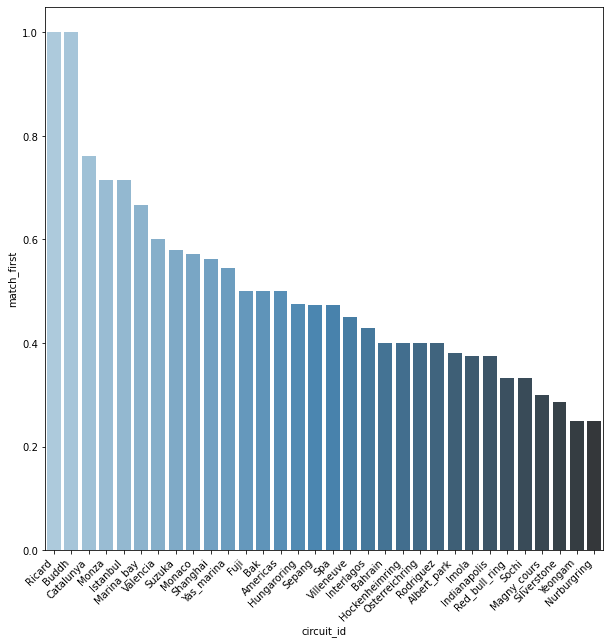

In [ ]:
# creates dataframe of only those who are in pole position

first_grid = rec_results.loc[rec_results["grid"] == 1].reset_index(drop = True)

# creates dictionary containing proportion of times drivers finished first in each circuit when they started in pole position

first_dict = {}
match = 0
for i in cap_circuits:
    match = 0
    df = first_grid.loc[first_grid["circuit_id"] == i].reset_index(drop = True)
    for k in range(len(df)):
        if df["grid"][k] == df["podium"][k]:
            match += 1
    first_dict[i.capitalize()] = match / len(df)

prop_first = pd.DataFrame(first_dict.items(), columns = ["circuit_id", "match_first"]).sort_values(by = ["match_first"], ascending= False)
prop_first
#thirty_index = list(range(4, 34))
#top_thirty = prop_first.iloc[thirty_index]

# barplot showing the proportion of times drivers finished first in each circuit when they started in pole position

fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="circuit_id", y="match_first", ax = ax, data=prop_first,
                palette="Blues_d").set_xticklabels(labels = prop_first["circuit_id"], rotation=45, horizontalalignment='right')

In [ ]:
first_grid.loc[first_grid["circuit_id"] == "catalunya"]

,season,round,circuit_id,driver,date_of_birth,nationality,constructor,grid,time,status,points,podium
4,1999,5,catalunya,hakkinen,1968-09-28,Finnish,mclaren,1,5653665.0,Finished,10.0,1
20,2000,5,catalunya,michael_schumacher,1969-01-03,German,ferrari,1,5683373.0,Finished,2.0,5
37,2001,5,catalunya,michael_schumacher,1969-01-03,German,ferrari,1,5463305.0,Finished,10.0,1
54,2002,5,catalunya,michael_schumacher,1969-01-03,German,ferrari,1,5429981.0,Finished,10.0,1
71,2003,5,catalunya,michael_schumacher,1969-01-03,German,ferrari,1,5626933.0,Finished,10.0,1
87,2004,5,catalunya,michael_schumacher,1969-01-03,German,ferrari,1,5252841.0,Finished,10.0,1
105,2005,5,catalunya,raikkonen,1979-10-17,Finnish,mclaren,1,5236830.0,Finished,10.0,1
125,2006,6,catalunya,alonso,1981-07-29,Spanish,renault,1,5181759.0,Finished,10.0,1
141,2007,4,catalunya,massa,1981-04-25,Brazilian,ferrari,1,5496230.0,Finished,10.0,1
158,2008,4,catalunya,raikkonen,1979-10-17,Finnish,ferrari,1,5899051.0,Finished,10.0,1
